In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os

sns.set_style("whitegrid") 

# LSTM and GRU v1

In [47]:
folders = ["gru_clf", "gru2_clf", "lstm_clf", "grusmall_clf", "gruverysmall_clf"]

history_files = ["val_top", "val_med", "val_low", "val_non", "val_put"]
suffix = ["loss", "acc"][1]


metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + suffix + "." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


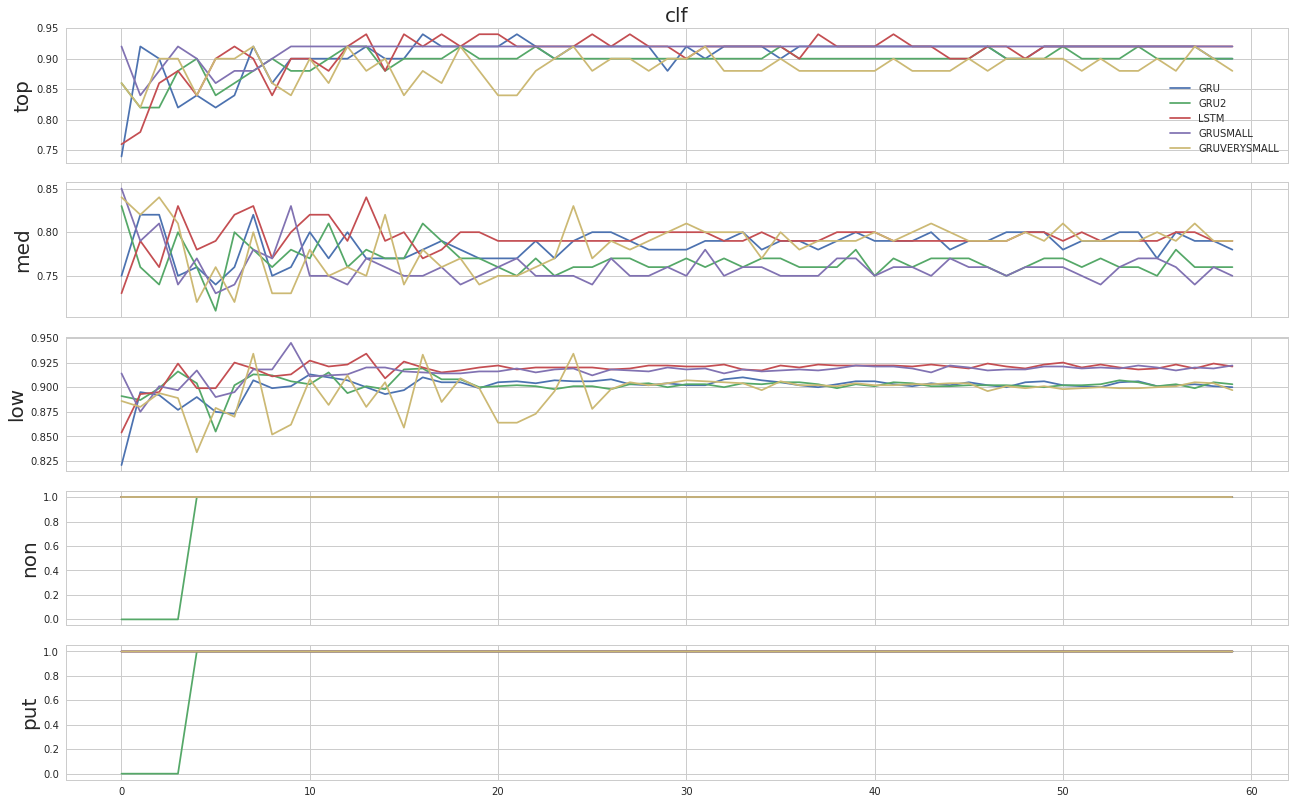

In [51]:
n_app = 1

fig = plt.figure(figsize=(18, 12))

ax = []
for i in range(5):
    ax.append([fig.add_subplot(5, n_app,n_app*i+1)])
    for j in range(1,n_app):
        ax[-1].append(fig.add_subplot(5, n_app, n_app*i + j + 1, sharey=ax[-1][-1]))
        
fig.tight_layout(pad=0.1)

for r, hs in enumerate(history_files):
    _, approach = metrics[hs]
    for c, app in enumerate(approach):
        if c == 0: ax[r][c].set_ylabel(hs.split("_")[1], fontsize=20)
        for subkey in approach[app]:
            ax[r][c].plot(approach[app][subkey], label = subkey.upper())
        if r != 4:
            ax[r][c].set_xticklabels([])
        if r == 0:
            ax[r][c].set_title(app, fontsize=20)
    ax[0][0].legend()
    

plt.gcf().subplots_adjust(bottom=0.1, top=.97, left=.05)
fig.savefig("clf_test1.png", dpi=300, pad_inches=-1)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


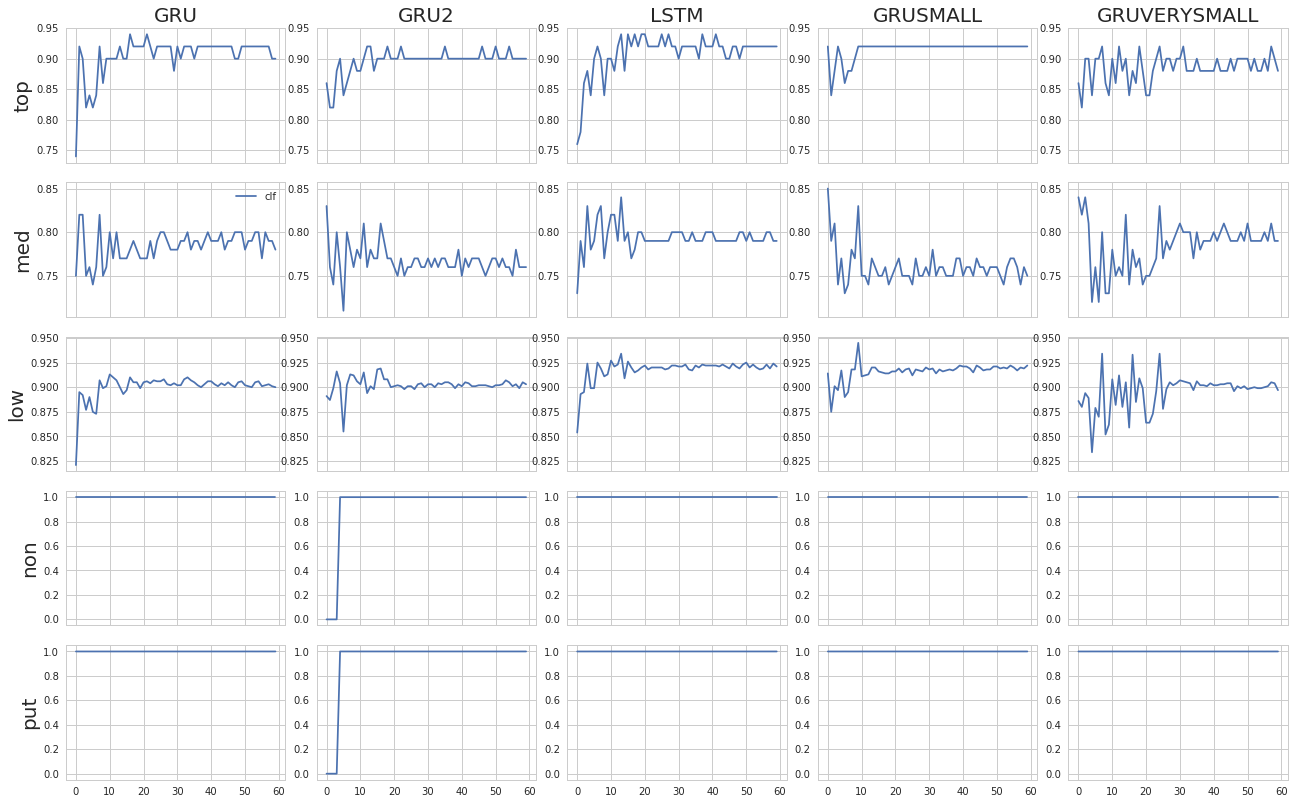

In [52]:
n_models = 5

fig = plt.figure(figsize=(18, 12))
ax = []

for i in range(5):
    ax.append([fig.add_subplot(5, n_models, n_models*i+1)])
    for j in range(1,n_models):
        ax[-1].append(fig.add_subplot(5, n_models, n_models*i + j + 1, sharey=ax[-1][-1]))
        
fig.tight_layout(pad=0.1)

for r, hs in enumerate(history_files):
    models, _ = metrics[hs]
    for c, mod in enumerate(models):
        if c == 0: ax[r][c].set_ylabel(hs.split("_")[1], fontsize=20)
        for subkey in models[mod]:
            ax[r][c].plot(models[mod][subkey], label = subkey)
        if r != 4:
            ax[r][c].set_xticklabels([])
        if r == 0:
            ax[r][c].set_title(mod.upper(), fontsize=20)
    ax[1][0].legend()
    
plt.gcf().subplots_adjust(bottom=0.1, top=.97, left=.05)
fig.savefig("clf_test2.png", dpi=300, pad_inches=-1)

# GRU v2 models

In [69]:
# no 9mers_imbalanced due to the very poor results

folders = ["gru_wei", "gru2_wei", "gru3_wei", "gru4_wei",
           "gru_fade", "gru2_fade", "gru3_fade", "gru4_fade"]

history_files = ["val_top", "val_med", "val_low", "val_non", "val_put"]

metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)

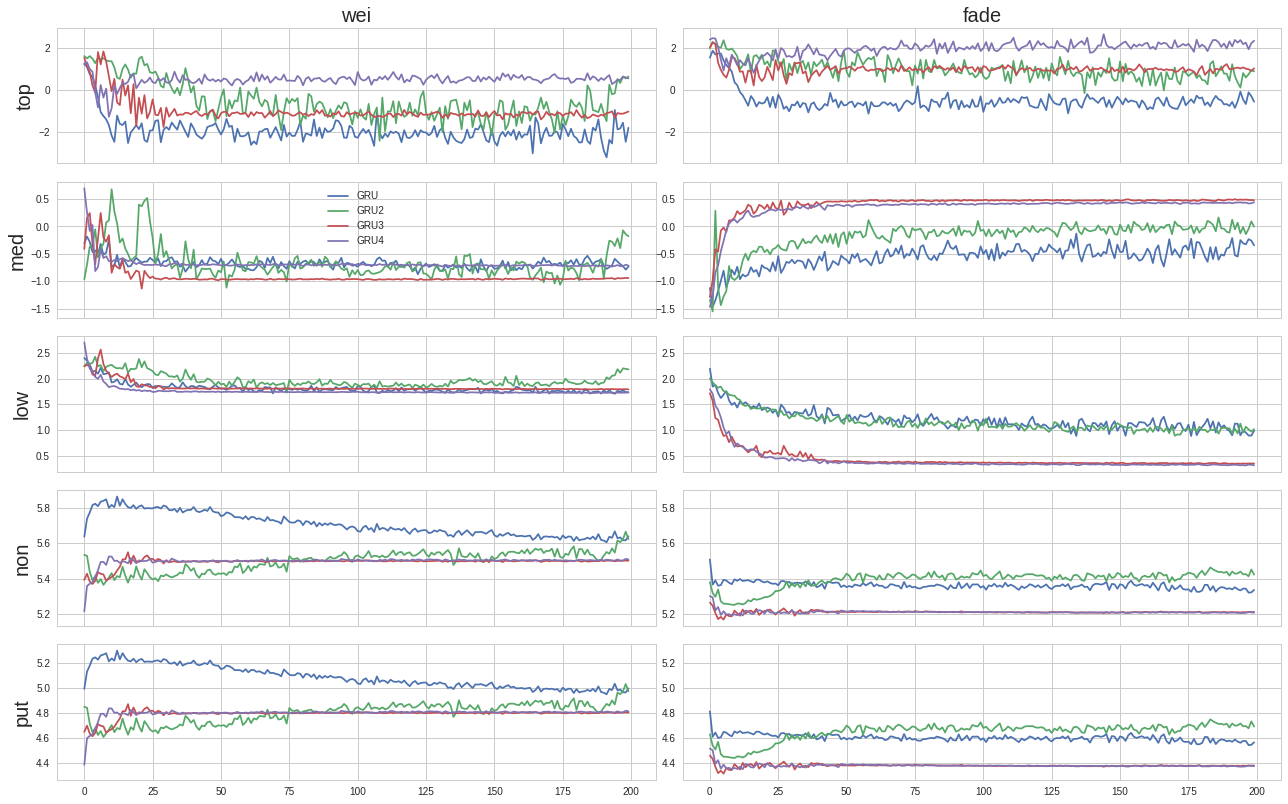

In [70]:
fig = plt.figure(figsize=(18, 12))
ax = []
for i in range(5):
    ax.append([fig.add_subplot(5, 2, 2*i+1)])
    for j in range(1,2):
        ax[-1].append(fig.add_subplot(5, 2, 2*i + j + 1, sharey=ax[-1][-1]))
        
fig.tight_layout(pad=0)

for r, hs in enumerate(history_files):
    _, approach = metrics[hs]
    for c, app in enumerate(approach):
        if c == 0: ax[r][c].set_ylabel(hs.split("_")[1], fontsize=20)
        for subkey in sorted(approach[app]):
            ax[r][c].plot(np.log(approach[app][subkey]), label = subkey.upper())
        if r != 4:
            ax[r][c].set_xticklabels([])
        if r == 0:
            ax[r][c].set_title(app, fontsize=20)
    ax[1][0].legend()
    
plt.gcf().subplots_adjust(bottom=0.1, top=.97, left=.05)
fig.savefig("fig3.png", dpi=300, pad_inches=-1)

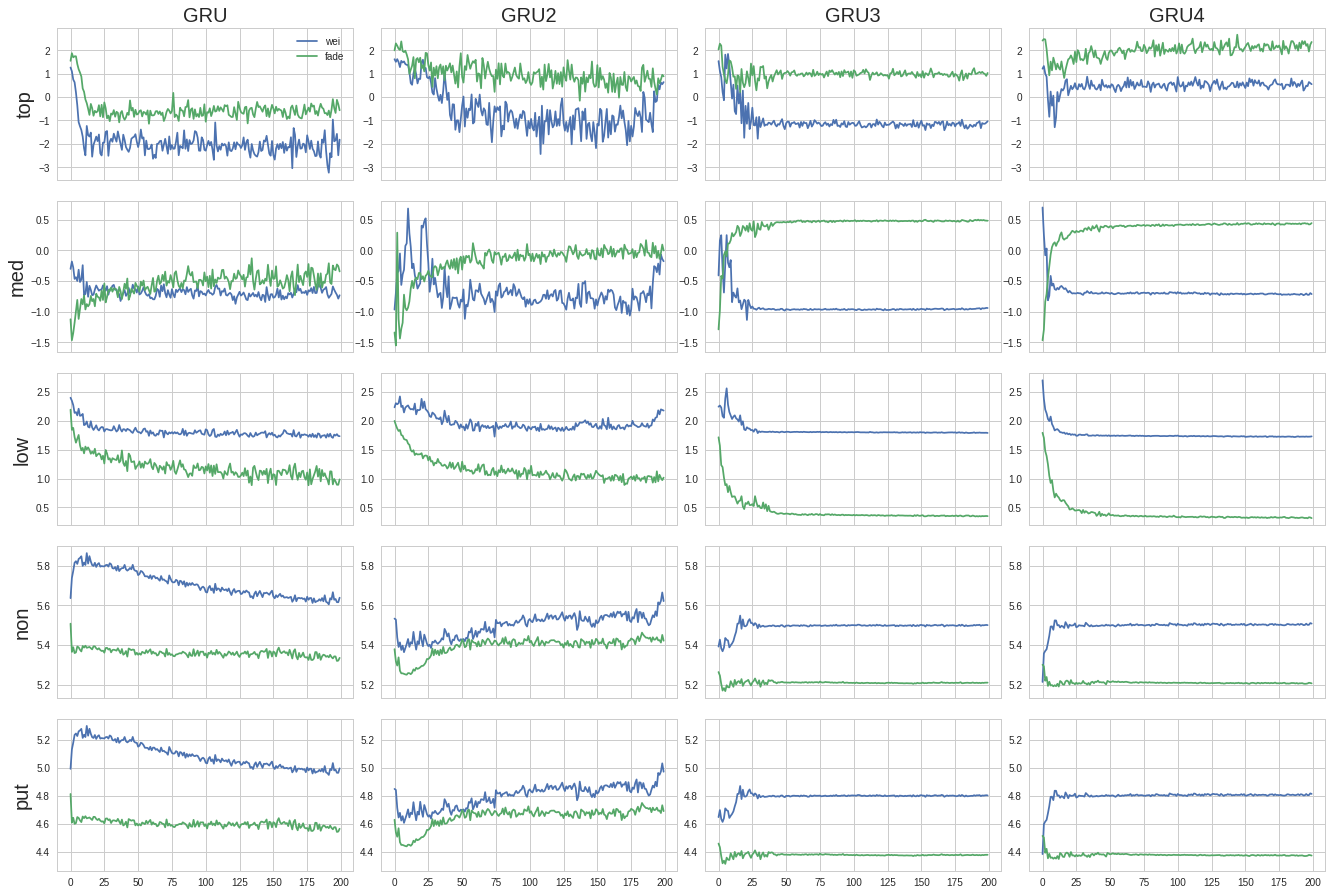

In [48]:
n_models = 4

fig = plt.figure(figsize=(18, 12))
ax = []

for i in range(5):
    ax.append([fig.add_subplot(5, n_models, n_models*i+1)])
    for j in range(1,n_models):
        ax[-1].append(fig.add_subplot(5, n_models, n_models*i + j + 1, sharey=ax[-1][-1]))
        
fig.tight_layout(pad=0)

for r, hs in enumerate(history_files):
    models, _ = metrics[hs]
    for c, mod in enumerate(sorted(models.keys())):
        if c == 0: 
            ax[r][c].set_ylabel(hs.split("_")[1], fontsize=20)
        
        for subkey in models[mod]:
            ax[r][c].plot(np.log(models[mod][subkey]), label = subkey)
        if r != 4:
            ax[r][c].set_xticklabels([])
        if r == 0:
            ax[r][c].set_title(mod.upper(), fontsize=20)
    ax[0][0].legend()

In [34]:
from IPython.display import display, SVG
from keras.utils.visualize_util import model_to_dot
from keras.models import model_from_json

# Show the model in ipython notebook
model = model_from_json("gru2_fade/model.1.hdf5")
figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)

# Save the model as png file
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png', show_shapes=True)

ImportError: No module named visualize_util

In [32]:
np.random.randint(0, 10, 20)

array([4, 1, 1, 1, 1, 4, 7, 0, 9, 7, 9, 3, 5, 2, 9, 9, 5, 4, 7, 4])